In [2]:
import numpy as np  
import pandas as pd 
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split



In [3]:
df=pd.read_csv('covid_and_healthy_spectra.csv')

features=df.iloc[:,:-1]
target=df.iloc[:,-1]



Splitting the data into train and test 

In [4]:
X_train, X_test, y_train, y_test = train_test_split(features,target, test_size=0.12, random_state=0)

As the number of features of the data is much larger than the number of instances . Logistic regression with lasso regularization seem to yield better results . 
So the logistic regression model will be defined with 'L1' penalty  

In [5]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

clf = LogisticRegression(penalty='l1',random_state=0,solver='liblinear')


#Fitting the model
clf.fit(X_train,y_train)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l1',
                   random_state=0, solver='liblinear', tol=0.0001, verbose=0,
                   warm_start=False)

Let us look at the classification report of the train and test dataset respectively 

In [6]:
print(f"Classification report for train-dataset:\n{classification_report(clf.predict(X_train), y_train)}")

Classification report for train-dataset:
              precision    recall  f1-score   support

     Healthy       0.99      0.89      0.94       148
  SARS-CoV-2       0.88      0.99      0.93       123

    accuracy                           0.93       271
   macro avg       0.94      0.94      0.93       271
weighted avg       0.94      0.93      0.93       271



In [7]:
print(f"Classification report for test-dataset:\n{classification_report(clf.predict(X_test), y_test)}")

Classification report for test-dataset:
              precision    recall  f1-score   support

     Healthy       1.00      0.95      0.97        19
  SARS-CoV-2       0.95      1.00      0.97        19

    accuracy                           0.97        38
   macro avg       0.97      0.97      0.97        38
weighted avg       0.97      0.97      0.97        38



Confusion matrix of the model's performance on test dataset 

<Figure size 432x288 with 0 Axes>

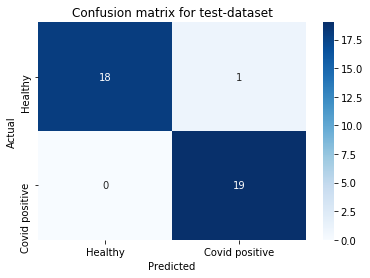

<Figure size 432x288 with 0 Axes>

In [10]:
from seaborn import heatmap 

heatmap(confusion_matrix(clf.predict(X_test), y_test), annot=True,cmap='Greens', fmt="g", yticklabels=["Healthy", "Covid positive"] ,xticklabels=["Healthy", "Covid positive"])
plt.title("Confusion matrix for test-dataset")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.figure()

Check the sparsity for L1,Elastic Net and L2 regularization  

C=1.00
Sparsity with L1 penalty:                99.44%
Sparsity with Elastic-Net penalty:       94.11%
Sparsity with L2 penalty:                1.00%
Score with L1 penalty:                   0.89
Score with Elastic-Net penalty:          0.79
Score with L2 penalty:                   0.82
C=0.10
Sparsity with L1 penalty:                100.00%
Sparsity with Elastic-Net penalty:       100.00%
Sparsity with L2 penalty:                1.00%
Score with L1 penalty:                   0.53
Score with Elastic-Net penalty:          0.53
Score with L2 penalty:                   0.66
C=0.01
Sparsity with L1 penalty:                100.00%
Sparsity with Elastic-Net penalty:       100.00%
Sparsity with L2 penalty:                1.00%
Score with L1 penalty:                   0.53
Score with Elastic-Net penalty:          0.47
Score with L2 penalty:                   0.53


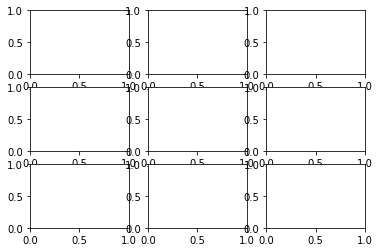

In [9]:

l1_ratio = 0.5  # L1 weight in the Elastic-Net regularization

fig, axes = plt.subplots(3, 3)

# Set regularization parameter
for i, (C, axes_row) in enumerate(zip((1, 0.1, 0.01), axes)):
    # turn down tolerance for short training time
    clf_l1_LR = LogisticRegression(C=C, penalty='l1', tol=0.01, solver='saga')
    clf_l2_LR = LogisticRegression(C=C, penalty='l2', tol=0.01, solver='saga')
    clf_en_LR = LogisticRegression(C=C, penalty='elasticnet', solver='saga',
                                   l1_ratio=l1_ratio, tol=0.01)
    clf_l1_LR.fit(X_train, y_train)
    clf_l2_LR.fit(X_train, y_train)
    clf_en_LR.fit(X_train, y_train)

    coef_l1_LR = clf_l1_LR.coef_.ravel()
    coef_l2_LR = clf_l2_LR.coef_.ravel()
    coef_en_LR = clf_en_LR.coef_.ravel()

    # coef_l1_LR contains zeros due to the
    # L1 sparsity inducing norm

    sparsity_l1_LR = np.mean(coef_l1_LR == 0) * 100
    sparsity_l2_LR = np.mean(coef_l2_LR == 0) * 100
    sparsity_en_LR = np.mean(coef_en_LR == 0) * 100

    print("C=%.2f" % C)
    print("{:<40} {:.2f}%".format("Sparsity with L1 penalty:", sparsity_l1_LR))
    print("{:<40} {:.2f}%".format("Sparsity with Elastic-Net penalty:",
                                  sparsity_en_LR))
    print("{:<40} {:.2f}%".format("Sparsity with L2 penalty:", sparsity_l2_LR))
    print("{:<40} {:.2f}".format("Score with L1 penalty:",
                                 clf_l1_LR.score(X_test, y_test)))
    print("{:<40} {:.2f}".format("Score with Elastic-Net penalty:",
                                 clf_en_LR.score(X_test, y_test)))
    print("{:<40} {:.2f}".format("Score with L2 penalty:",
                                 clf_l2_LR.score(X_test, y_test)))

